In [2]:
import requests
import matplotlib.pyplot as plt

def get_load_profile(city, state, api_key):
    url = "https://developer.nrel.gov/api/building-stock/v1"
    params = {
        "api_key": api_key,
        "location": f"{city},{state}",
        "sector": "residential",  # or 'commercial'
        "end_use": "electricity"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

def plot_load_profile(city, load_profile, ax):
    hours = list(range(1, 25))
    ax.plot(hours, load_profile, label=city)
    ax.set_xticks(hours)
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Load (kWh)")
    ax.set_title("Typical Building Load Profile")
    ax.legend()

api_key = "VtYyot76lhnzYiBrh80u3BVO2BJJVyKCD14FpOYS"

# Get load profiles for Berkeley and Los Angeles
berkeley_data = get_load_profile("Berkeley", "CA", api_key)
la_data = get_load_profile("Los Angeles", "CA", api_key)

# Extract load profiles (assuming the response contains hourly load data)
berkeley_load_profile = berkeley_data['results']['hourly_loads']
la_load_profile = la_data['results']['hourly_loads']

# Plot the load profiles
fig, ax = plt.subplots()
plot_load_profile("Berkeley", berkeley_load_profile, ax)
plot_load_profile("Los Angeles", la_load_profile, ax)
plt.show()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import requests

api_key = 'VtYyot76lhnzYiBrh80u3BVO2BJJVyKCD14FpOYS'

url = f'https://developer.nrel.gov/api/building-loads/v1/load-shape.json?api_key={api_key}'

params = {
    'address': 'Golden, CO',
    'year': 2021,
    'building_type': 'residential'
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f'Error: {response.status_code}')


Error: 404


In [ ]:
import requests

# Define the PVWatts API URL
url = 'https://developer.nrel.gov/api/pvwatts/v8.json'

# Define your API key
api_key = 'VtYyot76lhnzYiBrh80u3BVO2BJJVyKCD14FpOYS'

# Define the parameters for the PVWatts API request
params = {
    "api_key": 'DEMO_KEY',
    "azimuth":0,
    "lat": -6.1833,  # latitude
    "lon": 106.9499,  # longitude
    "system_capacity":4,
    "losses":14,
    "array_type":1,
    "module_type":0,
    "gcr":0.4,
    "dc_ac_ratio":1.2,
    "inv_eff":96.0,
    "radius":0,
    "dataset": "nsrdb",
    "tilt": 10
}

# Send the API request
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    data = response.json()
    # Process the response data as per your requirements
    # For example, you can access the estimated energy production
    ac_annual = data['outputs']['ac_annual']
    print(f"Estimated annual AC energy production: {ac_annual} kWh")
else:
    print(f"Request failed with status code {response.status_code}")


Estimated annual AC energy production: 5626.073303379153 kWh


In [ ]:
import requests

# Define the PVWatts API URL
url = 'https://developer.nrel.gov/api/building-stock/v1'
# url = 'https://developer.nrel.gov/api/building-loads/v1/load-shape.json'

# Define your API key
api_key = 'VtYyot76lhnzYiBrh80u3BVO2BJJVyKCD14FpOYS'

# Define the parameters for the PVWatts API request
params = {
    "api_key": api_key,
    # 'year': 2021,
    "location": "Berkeley,CA",
    "sector": "residential",  # or 'commercial'
    "end_use": "electricity"
}

# Send the API request
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    data = response.json()
    # Process the response data as per your requirements
    # For example, you can access the estimated energy production
    ac_annual = data['outputs']['ac_annual']
    print(f"Estimated annual AC energy production: {ac_annual} kWh")
else:
    print(f"Request failed with status code {response.status_code}")


Request failed with status code 404


In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

print(pa.__version__)  # This should print the version of pyarrow installed


# df = pd.read_parquet('../data/raw/CA_upgrade15_metadata_and_annual_results.parquet')
# df.to_csv('../data/output/building_results.csv')

table = pq.read_table('../data/raw/CA_upgrade15_metadata_and_annual_results.parquet')
# print(table.schema)
# print(table.schema.metadata)
print("Number of rows:", table.num_rows)
print("Number of columns:", len(table.columns))
print(table.column_names)


# List of columns you want to include
columns_needed = [
    'in.weather_file_latitude', 
    'in.weather_file_longitude', 
    # Add other energy consumption related columns as identified
    'out.electricity.heating.energy_consumption.kwh',
    'out.electricity.cooling.energy_consumption.kwh',
    # Add other relevant columns
]

# Create an empty DataFrame
df_selected = pd.DataFrame()

# Load the table
table = pq.read_table('../data/raw/CA_upgrade15_metadata_and_annual_results.parquet')

# Loop through the columns needed and convert each one
for col in columns_needed:
    if col in table.column_names:
        df_selected[col] = table.column(col).to_pandas()
    else:
        print(f"Column {col} not found in the table.")

# Check the first few rows to ensure data is loaded correctly
# print(df_selected.head())

# Specify the filename
output_filename = '../data/selected_data.csv'

# Save the DataFrame to CSV
df_selected.to_csv(output_filename, index=False)

print(f"Data saved to {output_filename}")

# Load the CSV to verify
df_loaded = pd.read_csv(output_filename)
print(df_loaded.head())


16.1.0
Number of rows: 57395
Number of columns: 392
['upgrade', 'weight', 'upgrade_name', 'applicability', 'in.sqft', 'in.ahs_region', 'in.aiannh_area', 'in.area_median_income', 'in.ashrae_iecc_climate_zone_2004', 'in.ashrae_iecc_climate_zone_2004_2_a_split', 'in.bathroom_spot_vent_hour', 'in.battery', 'in.bedrooms', 'in.building_america_climate_zone', 'in.cec_climate_zone', 'in.ceiling_fan', 'in.census_division', 'in.census_division_recs', 'in.census_region', 'in.city', 'in.clothes_dryer', 'in.clothes_dryer_usage_level', 'in.clothes_washer', 'in.clothes_washer_presence', 'in.clothes_washer_usage_level', 'in.cooking_range', 'in.cooking_range_usage_level', 'in.cooling_setpoint', 'in.cooling_setpoint_has_offset', 'in.cooling_setpoint_offset_magnitude', 'in.cooling_setpoint_offset_period', 'in.corridor', 'in.county', 'in.county_and_puma', 'in.county_name', 'in.dehumidifier', 'in.dishwasher', 'in.dishwasher_usage_level', 'in.door_area', 'in.doors', 'in.duct_leakage_and_insulation', 'in.duc

In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

# Create a simple table
data = {'column1': [1, 2, 3], 'column2': ['A', 'B', 'C']}
table = pa.Table.from_pandas(pd.DataFrame(data))

# Convert to Pandas DataFrame
df = table.to_pandas()
print(df)

   column1 column2
0        1       A
1        2       B
2        3       C


In [ ]:
import requests

def fetch_nrel_pv_data(api_key, lat, lon):
    base_url = "https://developer.nrel.gov/api/pvwatts/v6.json"
    params = {
        'api_key': api_key,
        'lat': lat,
        'lon': lon,
        'system_capacity': 4,
        'azimuth': 180,
        'tilt': 20,
        'array_type': 1,
        'module_type': 1,
        'losses': 14
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return "Failed to fetch data: Status code {}".format(response.status_code)

# Example usage:
api_key = 'VtYyot76lhnzYiBrh80u3BVO2BJJVyKCD14FpOYS'
lat = 37.8715  # Latitude for Berkeley
lon = -122.2730  # Longitude for Berkeley
data = fetch_nrel_pv_data(api_key, lat, lon)
print(data)


{'inputs': {'lat': '37.8715', 'lon': '-122.273', 'system_capacity': '4', 'azimuth': '180', 'tilt': '20', 'array_type': '1', 'module_type': '1', 'losses': '14'}, 'errors': [], 'warnings': [], 'version': '1.3.1', 'ssc_info': {'version': 45, 'build': 'Linux 64 bit GNU/C++ Jul  7 2015 14:24:09', 'module': 'pvwattsv5'}, 'station_info': {'lat': 37.88999938964844, 'lon': -122.2600021362305, 'elev': 200.2400054931641, 'tz': -8.0, 'location': 'None', 'city': '', 'state': 'California', 'country': 'United States', 'solar_resource_file': 'W12226N3789.csv', 'distance': 2362}, 'outputs': {'ac_monthly': [315.2407836914062, 347.5185852050781, 545.6384887695312, 624.438232421875, 690.178955078125, 695.232666015625, 686.9166259765625, 645.1370239257812, 568.3848266601562, 478.6064453125, 373.28076171875, 289.8890075683594], 'poa_monthly': [98.8522720336914, 109.1996917724609, 176.7241058349609, 205.0224304199219, 223.090576171875, 231.0050201416016, 228.7012939453125, 216.4822235107422, 191.291107177734

Index(['upgrade', 'in.iso_rto_region', 'in.geometry_building_type_recs',
       'timestamp', 'models_used', 'units_represented',
       'out.electricity.ceiling_fan.energy_consumption.kwh',
       'out.electricity.clothes_dryer.energy_consumption.kwh',
       'out.electricity.clothes_washer.energy_consumption.kwh',
       'out.electricity.cooling.energy_consumption.kwh',
       ...
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__electricity.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__fuel_oil.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__natural_gas.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__propane.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__electricity.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__fuel_oil.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__natu

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_52709/2464231433.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)  # Replace 0 with 1 to avoid division by zero


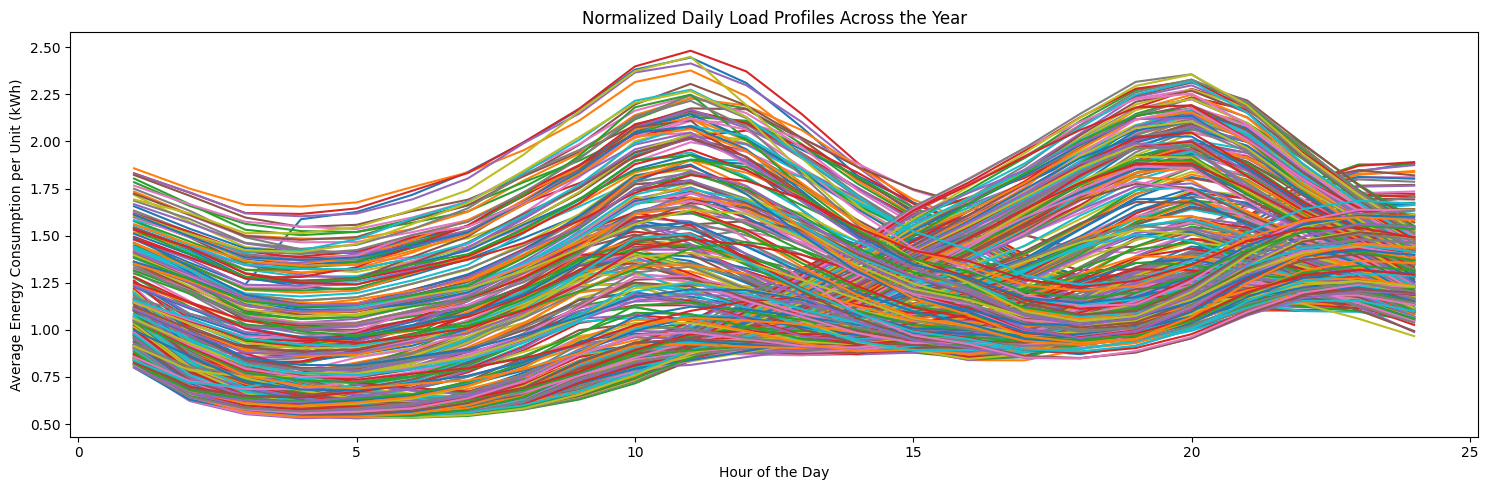

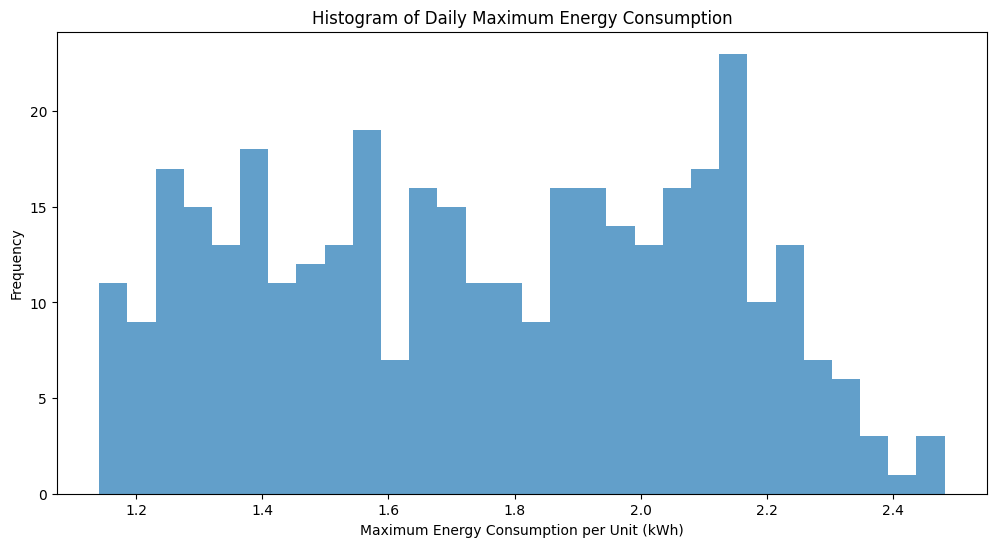

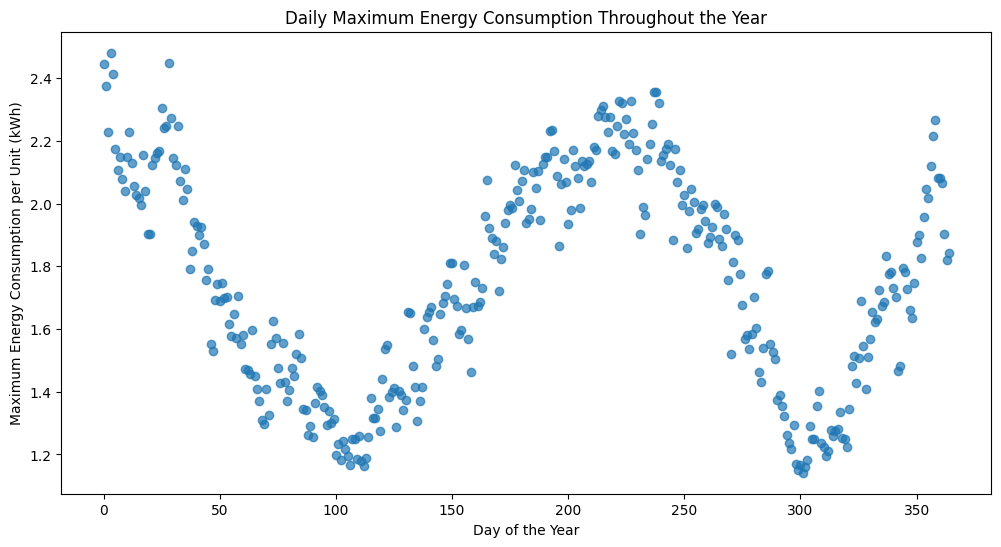

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_52709/2464231433.py:54: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(daily_max)


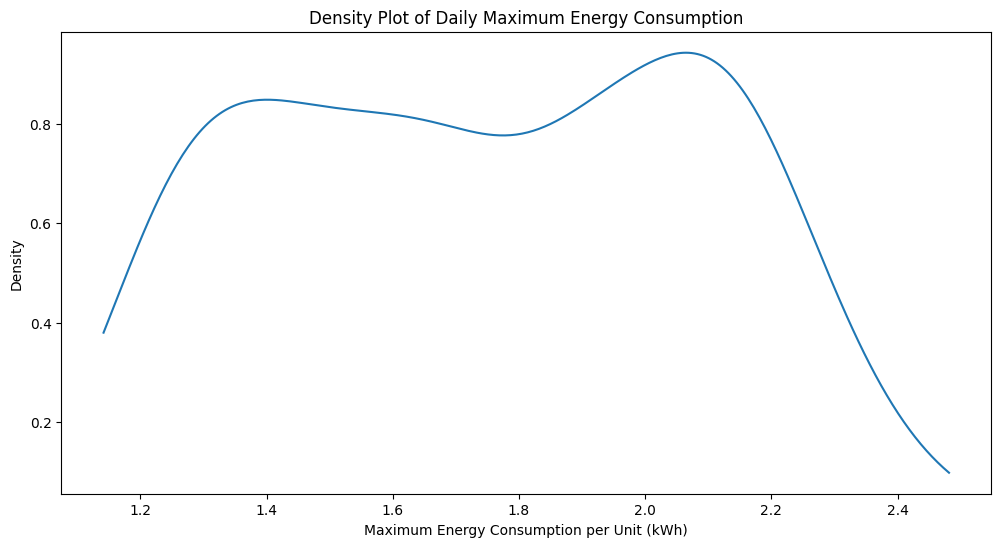

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('../data/raw/up09-caiso-single-family_detached.csv')

print(df.columns)

# Assuming 'out.electricity.total.energy_consumption.kwh' is the column for total electricity consumption
# and 'units_represented' scales the data
column_name = 'out.electricity.total.energy_consumption.kwh'
scale_factor_column = 'units_represented'

# Ensure units_represented is not zero to avoid division by zero
df[scale_factor_column].replace(0, 1, inplace=True)  # Replace 0 with 1 to avoid division by zero

# Scale the data by the number of units represented (divide to get the average per unit)
df[column_name] = df[column_name] / df[scale_factor_column]

# Reshape the data to have 365 rows (days) and 24 columns (hours)
reshaped_data = df[column_name].values.reshape(-1, 24)
# Reshape data to have 365 rows (days) and 24 columns (hours)
df['day_of_year'] = df.index // 24
daily_max = df.groupby('day_of_year')[column_name].max()

# Plotting each day's load profile
plt.figure(figsize=(15, 5))
for day in range(reshaped_data.shape[0]):
    plt.plot(range(1, 25), reshaped_data[day], label=f'Day {day+1}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption per Unit (kWh)')
plt.title('Normalized Daily Load Profiles Across the Year')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Uncomment if you want the legend back
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(daily_max, bins=30, alpha=0.7, label='Daily Maximums')
plt.title('Histogram of Daily Maximum Energy Consumption')
plt.xlabel('Maximum Energy Consumption per Unit (kWh)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(daily_max.index, daily_max, alpha=0.7)
plt.title('Daily Maximum Energy Consumption Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Energy Consumption per Unit (kWh)')
plt.show()

density = kde.gaussian_kde(daily_max)
x = np.linspace(daily_max.min(), daily_max.max(), 300)
plt.figure(figsize=(12, 6))
plt.plot(x, density(x))
plt.title('Density Plot of Daily Maximum Energy Consumption')
plt.xlabel('Maximum Energy Consumption per Unit (kWh)')
plt.ylabel('Density')
plt.show()



Index(['upgrade', 'in.state', 'in.geometry_building_type_recs', 'timestamp',
       'models_used', 'units_represented',
       'out.electricity.ceiling_fan.energy_consumption.kwh',
       'out.electricity.clothes_dryer.energy_consumption.kwh',
       'out.electricity.clothes_washer.energy_consumption.kwh',
       'out.electricity.cooling.energy_consumption.kwh',
       ...
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__electricity.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__fuel_oil.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__natural_gas.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15__propane.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_15.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__electricity.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__fuel_oil.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_midcase_25__natural_gas.c

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_52709/852881834.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)  # Replace 0 with 1 to avoid division by zero


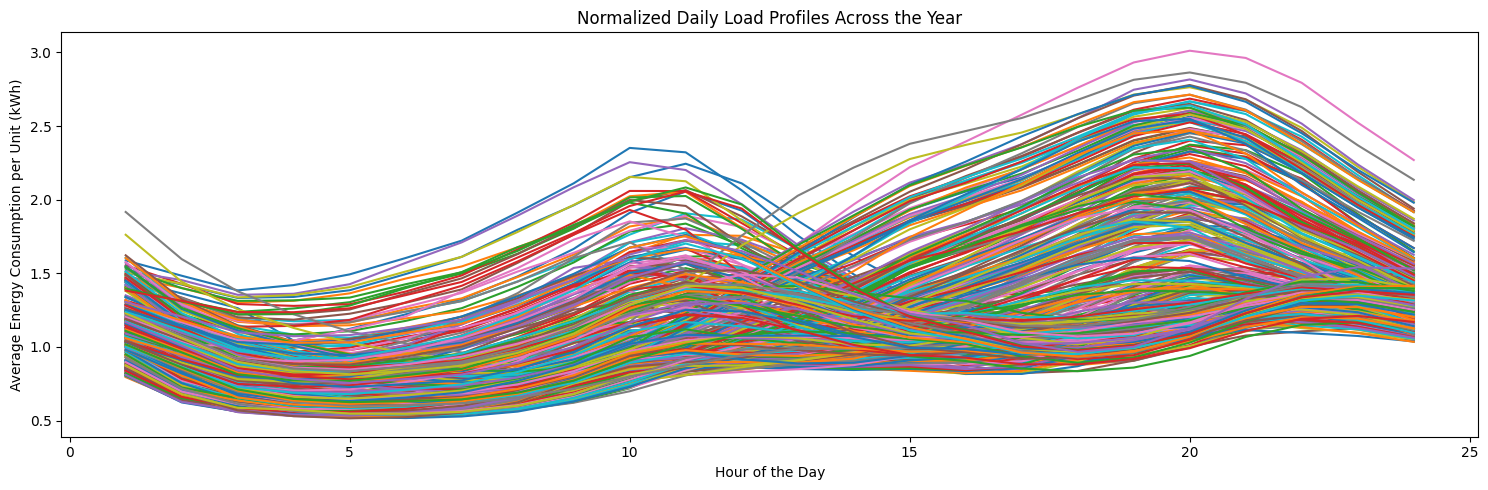

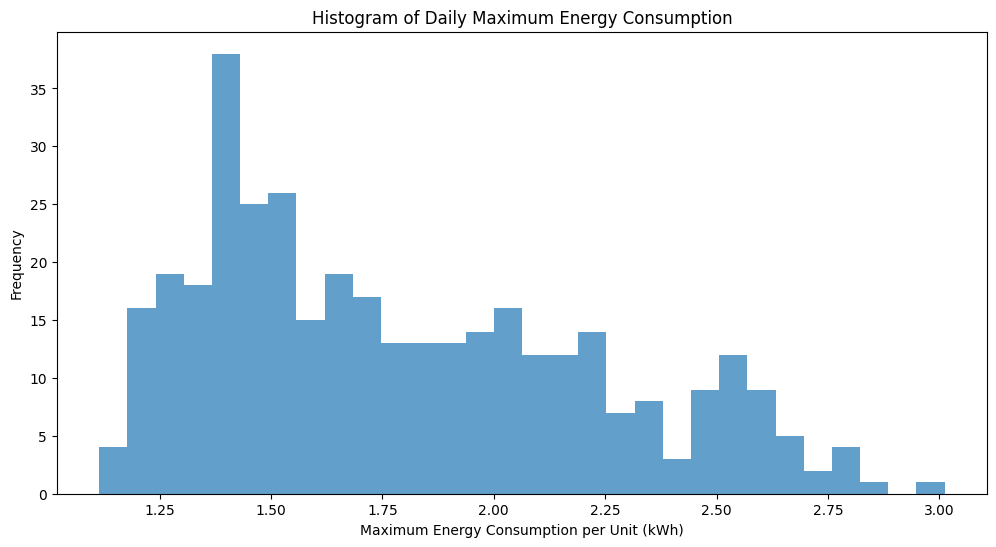

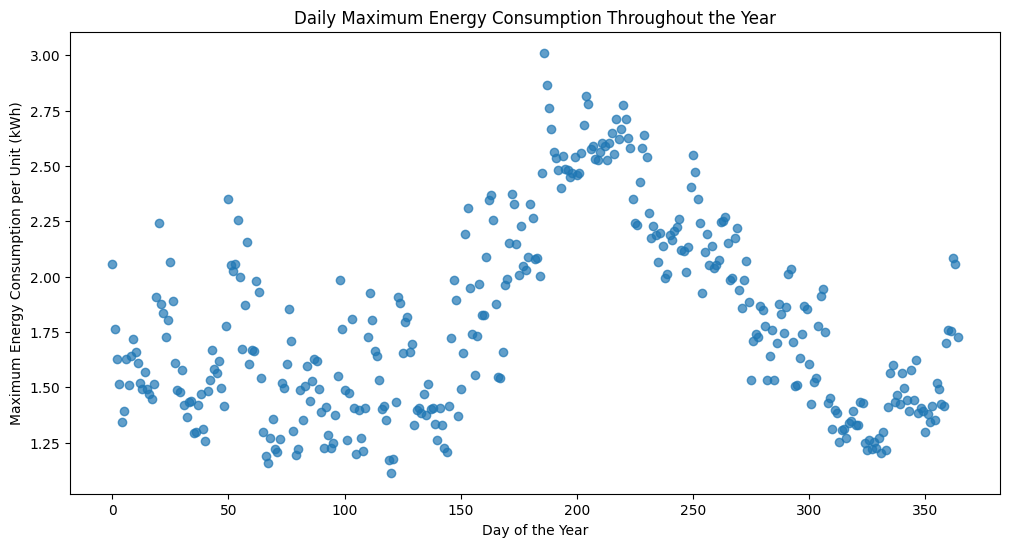

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_52709/852881834.py:54: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(daily_max)


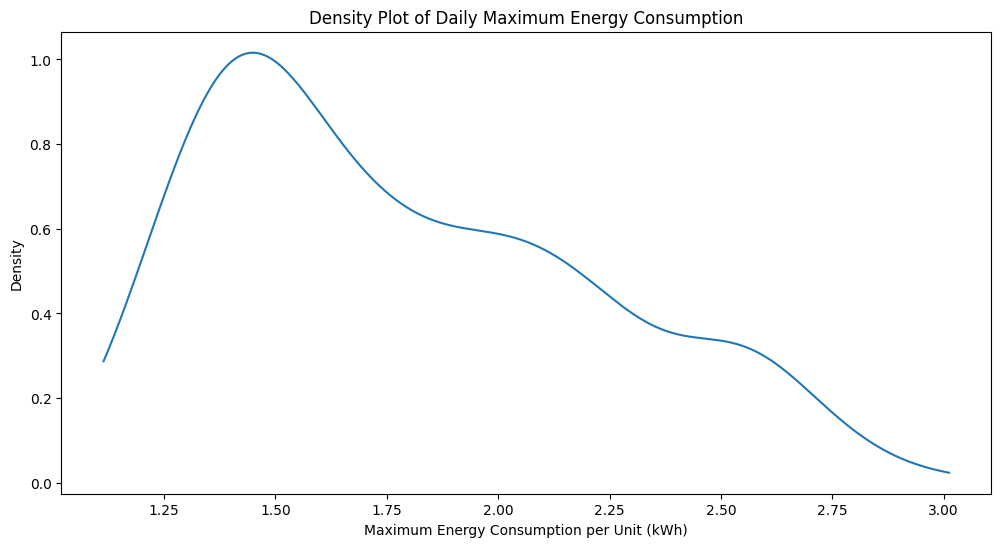

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('../data/raw/up09-ca-single-family_detached.csv')

print(df.columns)

# Assuming 'out.electricity.total.energy_consumption.kwh' is the column for total electricity consumption
# and 'units_represented' scales the data
column_name = 'out.electricity.total.energy_consumption.kwh'
scale_factor_column = 'units_represented'

# Ensure units_represented is not zero to avoid division by zero
df[scale_factor_column].replace(0, 1, inplace=True)  # Replace 0 with 1 to avoid division by zero

# Scale the data by the number of units represented (divide to get the average per unit)
df[column_name] = df[column_name] / df[scale_factor_column]

# Reshape the data to have 365 rows (days) and 24 columns (hours)
reshaped_data = df[column_name].values.reshape(-1, 24)
# Reshape data to have 365 rows (days) and 24 columns (hours)
df['day_of_year'] = df.index // 24
daily_max = df.groupby('day_of_year')[column_name].max()

# Plotting each day's load profile
plt.figure(figsize=(15, 5))
for day in range(reshaped_data.shape[0]):
    plt.plot(range(1, 25), reshaped_data[day], label=f'Day {day+1}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption per Unit (kWh)')
plt.title('Normalized Daily Load Profiles Across the Year')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Uncomment if you want the legend back
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(daily_max, bins=30, alpha=0.7, label='Daily Maximums')
plt.title('Histogram of Daily Maximum Energy Consumption')
plt.xlabel('Maximum Energy Consumption per Unit (kWh)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(daily_max.index, daily_max, alpha=0.7)
plt.title('Daily Maximum Energy Consumption Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Energy Consumption per Unit (kWh)')
plt.show()

density = kde.gaussian_kde(daily_max)
x = np.linspace(daily_max.min(), daily_max.max(), 300)
plt.figure(figsize=(12, 6))
plt.plot(x, density(x))
plt.title('Density Plot of Daily Maximum Energy Consumption')
plt.xlabel('Maximum Energy Consumption per Unit (kWh)')
plt.ylabel('Density')
plt.show()



/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


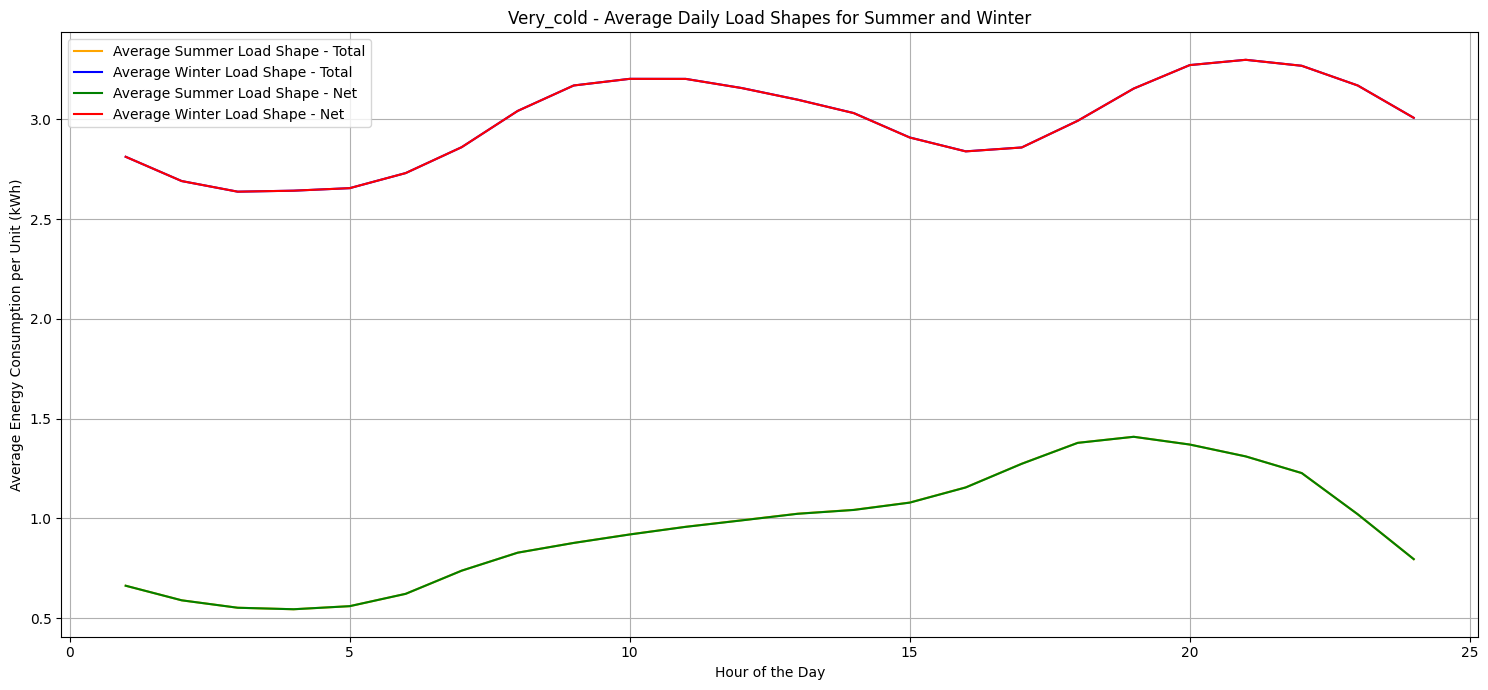

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


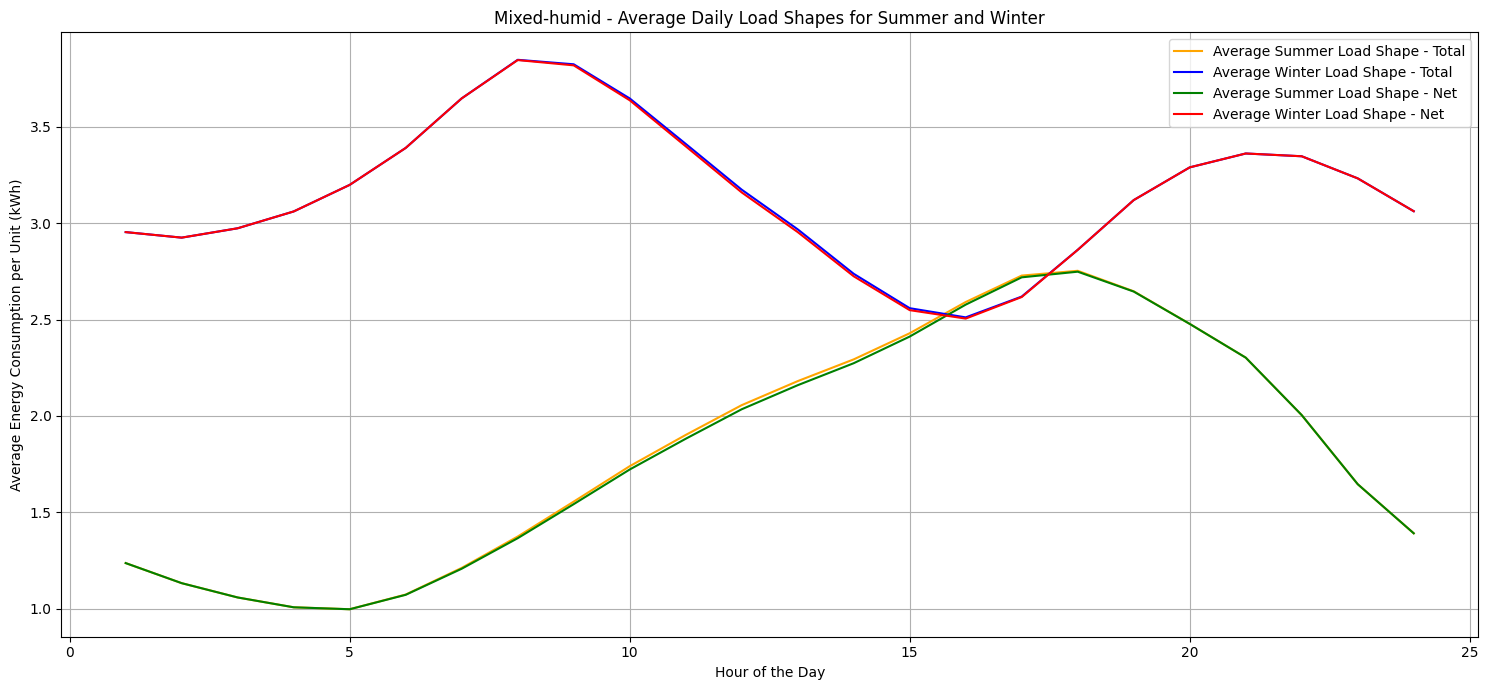

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


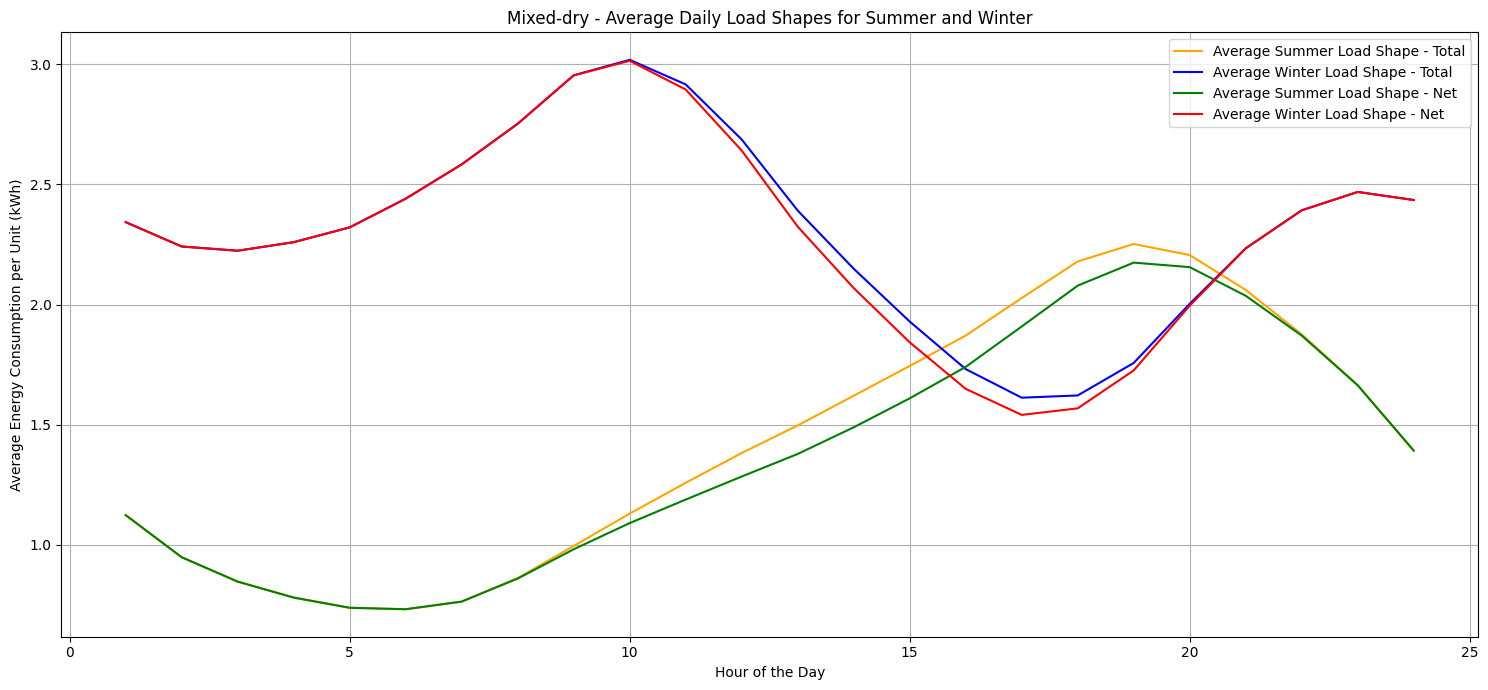

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


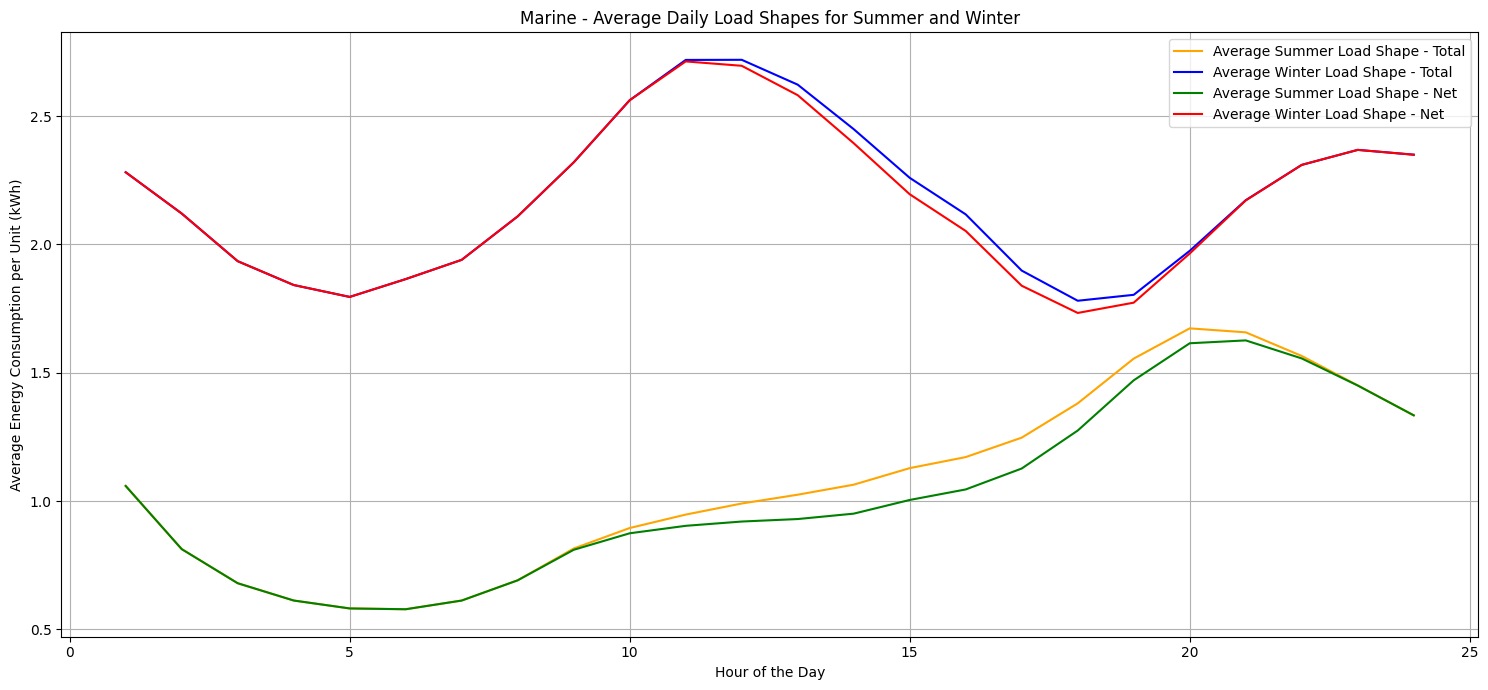

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


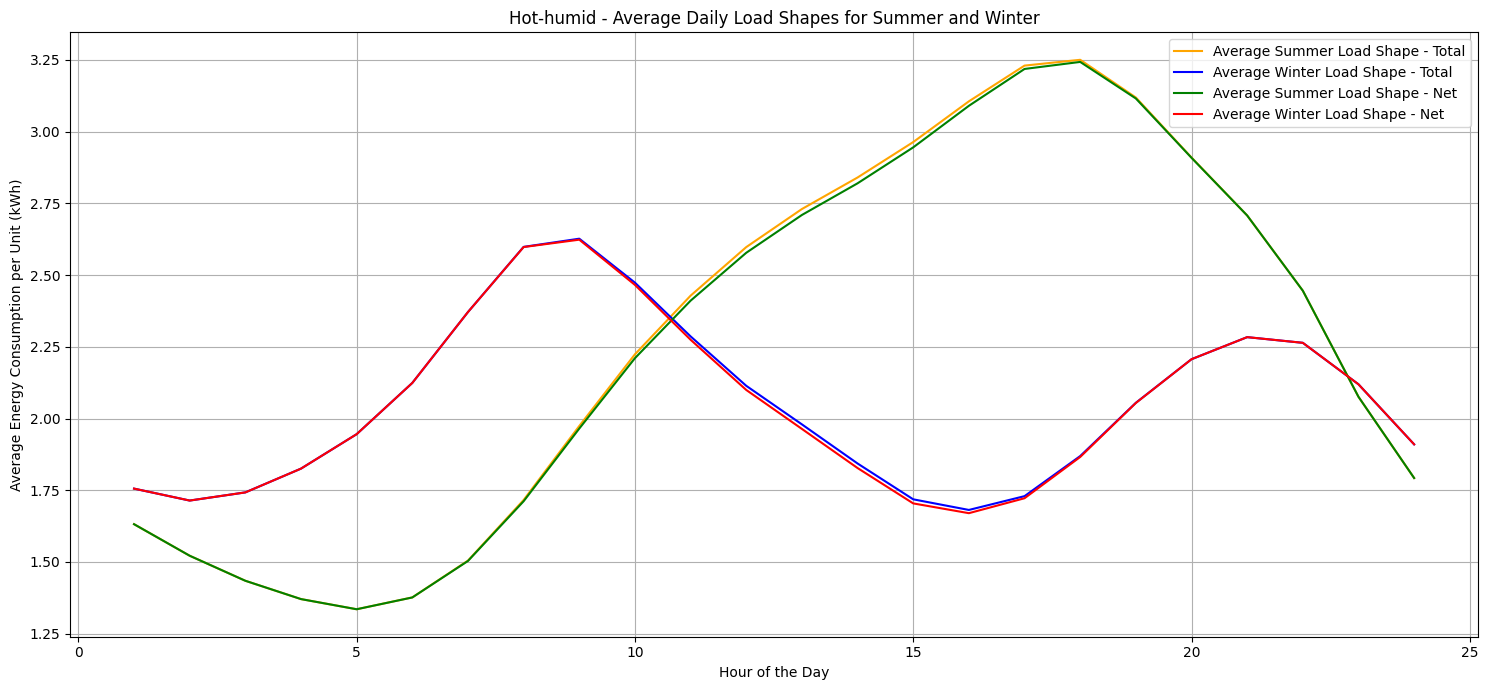

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


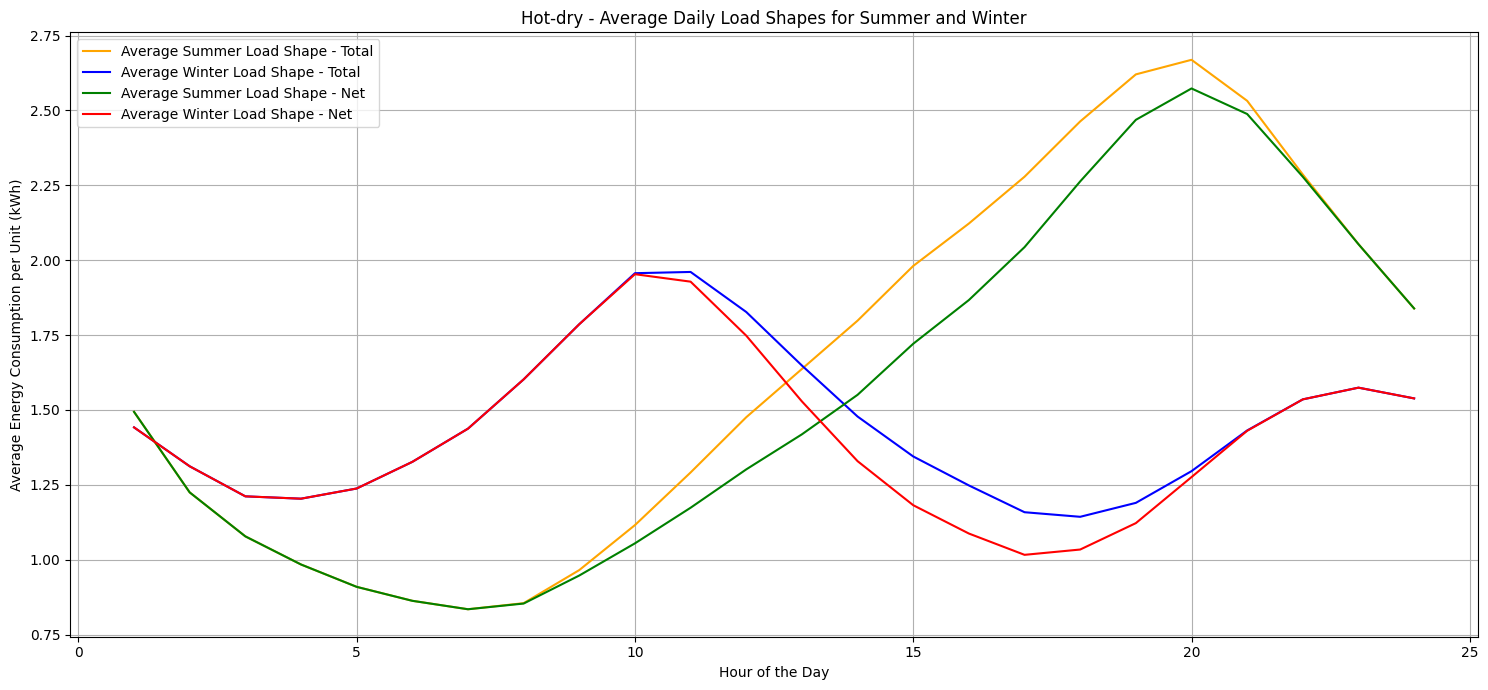

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_55635/3805285518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


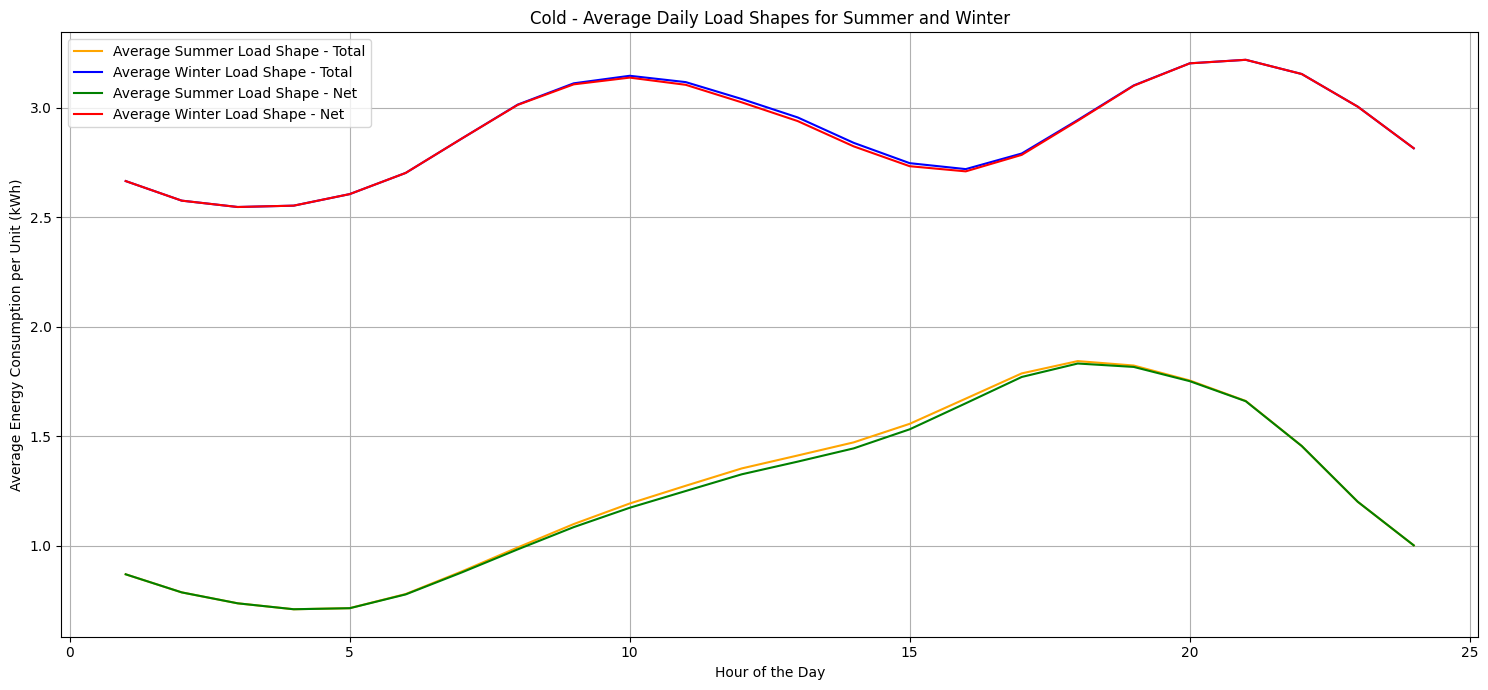

very_cold
[0.6630204343077961, 0.589933725758449, 0.5526774853590631, 0.5451396649385561, 0.5605857424875195, 0.6224244131624428, 0.738546229958718, 0.8286174965197777, 0.8774084521409373, 0.9197987621207764, 0.9580551915322586, 0.9904135014640943, 1.023515303979455, 1.0427244263632887, 1.0793892809139791, 1.1554798207085264, 1.2739967177899392, 1.378906117991552, 1.4093413228446627, 1.3705275657642098, 1.3110503882248465, 1.2275088055635566, 1.0210932819700465, 0.7962222302227345]
[2.812494912574406, 2.6908563678075406, 2.6376317150297623, 2.6426467633928583, 2.6552727151537705, 2.7308584015377004, 2.860695805431548, 3.0423177393353185, 3.16979029327877, 3.203049014136909, 3.202705673363095, 3.156830558655755, 3.0983511966765875, 3.031327012028772, 2.9089955419146842, 2.8394818235367087, 2.8590846385168676, 2.992836814856153, 3.1544084046378984, 3.2719679036458356, 3.298459294394843, 3.2685089409722248, 3.1697953187003973, 3.007745693824406]

mixed-humid
[1.2358487965678289, 1.1316659

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Array of climate zones
climate_zones = ["very_cold", "mixed-humid", "mixed-dry", "marine", "hot-humid", "hot-dry", "cold"]

# Base path for CSV files
base_path = '../data/raw/NREL/america-climate-zones/'

# Function to process and return load profiles
def get_load_profiles(zone):
    # Load the CSV file into a DataFrame
    file_path = f'{base_path}up09-{zone}-single-family_detached.csv'
    df = pd.read_csv(file_path)
    
    # Column names for total and net energy consumption
    total_energy_column = 'out.electricity.total.energy_consumption.kwh'
    net_energy_column = 'out.electricity.net.energy_consumption.kwh'
    scale_factor_column = 'units_represented'
    
    # Ensure units_represented is not zero to avoid division by zero
    df[scale_factor_column].replace(0, 1, inplace=True)
    
    # Convert columns to numeric to avoid TypeErrors during calculations
    df[total_energy_column] = pd.to_numeric(df[total_energy_column], errors='coerce')
    df[net_energy_column] = pd.to_numeric(df[net_energy_column], errors='coerce')
    df[scale_factor_column] = pd.to_numeric(df[scale_factor_column], errors='coerce')
    
    # Scale the data by the number of units represented (divide to get the average per unit)
    df[total_energy_column] = df[total_energy_column] / df[scale_factor_column]
    df[net_energy_column] = df[net_energy_column] / df[scale_factor_column]
    
    # Calculate day of year and filter for summer and winter days
    df['day_of_year'] = df.index // 24
    summer_days = df[df['day_of_year'].isin(range(152, 245))]  # June 1 to August 31
    winter_days = df[(df['day_of_year'] <= 59) | (df['day_of_year'] >= 335)]  # December 1 to February 28
    
    # Reshape data to get average profiles for summer and winter
    summer_reshaped_total = summer_days[total_energy_column].values.reshape(-1, 24)
    winter_reshaped_total = winter_days[total_energy_column].values.reshape(-1, 24)
    
    summer_reshaped_net = summer_days[net_energy_column].values.reshape(-1, 24)
    winter_reshaped_net = winter_days[net_energy_column].values.reshape(-1, 24)
    
    avg_summer_profile_total = summer_reshaped_total.mean(axis=0)
    avg_winter_profile_total = winter_reshaped_total.mean(axis=0)
    
    avg_summer_profile_net = summer_reshaped_net.mean(axis=0)
    avg_winter_profile_net = winter_reshaped_net.mean(axis=0)
    
    # Plotting
    plt.figure(figsize=(15, 7))
    
    # Plot total and net energy consumption for both summer and winter
    plt.plot(range(1, 25), avg_summer_profile_total, label='Average Summer Load Shape - Total', color='orange')
    plt.plot(range(1, 25), avg_winter_profile_total, label='Average Winter Load Shape - Total', color='blue')
    plt.plot(range(1, 25), avg_summer_profile_net, label='Average Summer Load Shape - Net', color='green')
    plt.plot(range(1, 25), avg_winter_profile_net, label='Average Winter Load Shape - Net', color='red')
    
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Energy Consumption per Unit (kWh)')
    plt.title(f'{zone.capitalize()} - Average Daily Load Shapes for Summer and Winter')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "summer": {
            "total": avg_summer_profile_total.tolist(),
            "net": avg_summer_profile_net.tolist()
        },
        "winter": {
            "total": avg_winter_profile_total.tolist(),
            "net": avg_winter_profile_net.tolist()
        }
    }

# Iterate through each climate zone and call function
load_profiles = {}
for zone in climate_zones:
    load_profiles[zone] = get_load_profiles(zone)

for zone in load_profiles:
    print(zone)
    print(load_profiles[zone]["summer"]["net"])
    print(load_profiles[zone]["winter"]["net"])
    print()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Array of climate zones
climate_zones = ["very_cold", "mixed-humid", "mixed-dry", "marine", "hot-humid", "hot-dry", "cold"]

# Base path for CSV files
base_path = '../data/raw/NREL/america-climate-zones/'

# Columns of interest
columns_of_interest = {
    "electric_stove": "out.electricity.range_oven.energy_consumption.kwh",
    "solar": "out.electricity.pv.energy_consumption.kwh",
    "heat_pump": [
        "out.electricity.heating_hp_bkup.energy_consumption.kwh",
        "out.electricity.heating_hp_bkup_fa.energy_consumption.kwh",
        "out.electricity.cooling.energy_consumption.kwh"
    ]
}

# Function to process and return load profiles
def get_load_profiles(zone):
    # Load the CSV file into a DataFrame
    file_path = f'{base_path}up09-{zone}-single-family_detached.csv'
    df = pd.read_csv(file_path)
    
    # Column names for total and net energy consumption
    total_energy_column = 'out.electricity.total.energy_consumption.kwh'
    net_energy_column = 'out.electricity.net.energy_consumption.kwh'
    scale_factor_column = 'units_represented'
    
    # Ensure units_represented is not zero to avoid division by zero
    df[scale_factor_column].replace(0, 1, inplace=True)
    
    # Convert columns to numeric to avoid TypeErrors during calculations
    df[total_energy_column] = pd.to_numeric(df[total_energy_column], errors='coerce')
    df[net_energy_column] = pd.to_numeric(df[net_energy_column], errors='coerce')
    df[scale_factor_column] = pd.to_numeric(df[scale_factor_column], errors='coerce')
    
    # Scale the data by the number of units represented (divide to get the average per unit)
    df[total_energy_column] = df[total_energy_column] / df[scale_factor_column]
    df[net_energy_column] = df[net_energy_column] / df[scale_factor_column]
    
    # Calculate day of year and filter for summer and winter days
    df['day_of_year'] = df.index // 24
    summer_days = df[df['day_of_year'].isin(range(152, 245))]  # June 1 to August 31
    winter_days = df[(df['day_of_year'] <= 59) | (df['day_of_year'] >= 335)]  # December 1 to February 28
    
    # Reshape data to get average profiles for summer and winter
    summer_reshaped_total = summer_days[total_energy_column].values.reshape(-1, 24)
    winter_reshaped_total = winter_days[total_energy_column].values.reshape(-1, 24)
    
    summer_reshaped_net = summer_days[net_energy_column].values.reshape(-1, 24)
    winter_reshaped_net = winter_days[net_energy_column].values.reshape(-1, 24)
    
    avg_summer_profile_total = summer_reshaped_total.mean(axis=0)
    avg_winter_profile_total = winter_reshaped_total.mean(axis=0)
    
    avg_summer_profile_net = summer_reshaped_net.mean(axis=0)
    avg_winter_profile_net = winter_reshaped_net.mean(axis=0)
    
    # Initialize dictionary for additional loads
    additional_loads = {
        "electric_stove": None,
        "solar": None,
        "heat_pump": None
    }
    
    # Process columns of interest
    for key, col_name in columns_of_interest.items():
        if isinstance(col_name, list):  # Handle list of columns (heat pump)
            for cn in col_name:
                df[cn] = pd.to_numeric(df[cn], errors='coerce')
                df[cn] = df[cn] / df[scale_factor_column]
            summer_values = [df[cn][summer_days.index].values.reshape(-1, 24).mean(axis=0) for cn in col_name]
            winter_values = [df[cn][winter_days.index].values.reshape(-1, 24).mean(axis=0) for cn in col_name]
            additional_loads[key] = {
                "summer": np.sum(summer_values, axis=0).tolist(),
                "winter": np.sum(winter_values, axis=0).tolist()
            }
        else:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name] / df[scale_factor_column]
            summer_values = df[col_name][summer_days.index].values.reshape(-1, 24).mean(axis=0)
            winter_values = df[col_name][winter_days.index].values.reshape(-1, 24).mean(axis=0)
            additional_loads[key] = {
                "summer": summer_values.tolist(),
                "winter": winter_values.tolist()
            }
    
    # Plotting
    # plt.figure(figsize=(15, 7))
    
    # # Plot total and net energy consumption for both summer and winter
    # plt.plot(range(1, 25), avg_summer_profile_total, label='Average Summer Load Shape - Total', color='orange')
    # plt.plot(range(1, 25), avg_winter_profile_total, label='Average Winter Load Shape - Total', color='blue')
    # plt.plot(range(1, 25), avg_summer_profile_net, label='Average Summer Load Shape - Net', color='green')
    # plt.plot(range(1, 25), avg_winter_profile_net, label='Average Winter Load Shape - Net', color='red')
    
    # for key, profiles in additional_loads.items():
    #     plt.plot(range(1, 25), profiles['summer'], label=f'Summer Load - {key.replace("_", " ").capitalize()}', linestyle='dotted')
    #     plt.plot(range(1, 25), profiles['winter'], label=f'Winter Load - {key.replace("_", " ").capitalize()}', linestyle='dotted')
    
    # plt.xlabel('Hour of the Day')
    # plt.ylabel('Average Energy Consumption per Unit (kWh)')
    # plt.title(f'{zone.capitalize()} - Average Daily Load Shapes for Summer and Winter')
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

    return {
        "summer": {
            "total": avg_summer_profile_total.tolist(),
            "net": avg_summer_profile_net.tolist(),
            **{key: value["summer"] for key, value in additional_loads.items()}
        },
        "winter": {
            "total": avg_winter_profile_total.tolist(),
            "net": avg_winter_profile_net.tolist(),
            **{key: value["winter"] for key, value in additional_loads.items()}
        }
    }

# Iterate through each climate zone and process
load_profiles = {}
for zone in climate_zones:
    load_profiles[zone] = get_load_profiles(zone)

# Example usage: Print the load profiles for "very_cold"
print(load_profiles["very_cold"])


/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_83437/744257241.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)
/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_83437/744257241.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

{'summer': {'total': [0.6630204343077961, 0.589933725758449, 0.5526774853590631, 0.5451396649385561, 0.5605857424875195, 0.6224244131624428, 0.7385491311443937, 0.8286891141033031, 0.8776349786386329, 0.9201667956749234, 0.9585293868807612, 0.9909558671754999, 1.0240784760224657, 1.0432682831701234, 1.0798957913306453, 1.155917329709102, 1.274332628288211, 1.379137996831798, 1.409459065380185, 1.3705706095190098, 1.3110659472206232, 1.2275093786002313, 1.0210932819700465, 0.7962222302227345], 'net': [0.6630204343077961, 0.589933725758449, 0.5526774853590631, 0.5451396649385561, 0.5605857424875195, 0.6224244131624428, 0.738546229958718, 0.8286174965197777, 0.8774084521409373, 0.9197987621207764, 0.9580551915322586, 0.9904135014640943, 1.023515303979455, 1.0427244263632887, 1.0793892809139791, 1.1554798207085264, 1.2739967177899392, 1.378906117991552, 1.4093413228446627, 1.3705275657642098, 1.3110503882248465, 1.2275088055635566, 1.0210932819700465, 0.7962222302227345], 'electric_stove':

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_83437/744257241.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


In [3]:
for zone in load_profiles:
    print(zone)
    
    # Calculate the resulting summer load profile
    summer_net = np.array(load_profiles[zone]["summer"]["net"])
    summer_electric_stove = summer_net + np.array(load_profiles[zone]["summer"]["electric_stove"])
    summer_solar = np.array(load_profiles[zone]["summer"]["solar"])
    summer_heat_pump = summer_net + np.array(load_profiles[zone]["summer"]["heat_pump"])
    # summer_resulting_load = summer_net + summer_electric_stove + summer_solar + summer_heat_pump
    
    # print("Summer Net Load Profile:")
    # print(load_profiles[zone]["summer"]["net"])
    print("Summer Heat Pump:")
    print(summer_heat_pump.tolist())
    
    # Calculate the resulting winter load profile
    winter_net = np.array(load_profiles[zone]["winter"]["net"])
    winter_electric_stove = winter_net + np.array(load_profiles[zone]["winter"]["electric_stove"])
    winter_solar = np.array(load_profiles[zone]["winter"]["solar"])
    winter_heat_pump = winter_net + np.array(load_profiles[zone]["winter"]["heat_pump"])
    # winter_resulting_load = winter_net + winter_electric_stove + winter_solar + winter_heat_pump
    
    # print("Winter Net Load Profile:")
    # print(load_profiles[zone]["winter"]["net"])
    print("Winter Heat Pump")
    print(winter_heat_pump.tolist())
    # print("Winter Resulting Load Profile (Net + Additions):")
    # print(winter_resulting_load.tolist())
    
    print()


NameError: name 'load_profiles' is not defined

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_83437/2607773537.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[scale_factor_column].replace(0, 1, inplace=True)


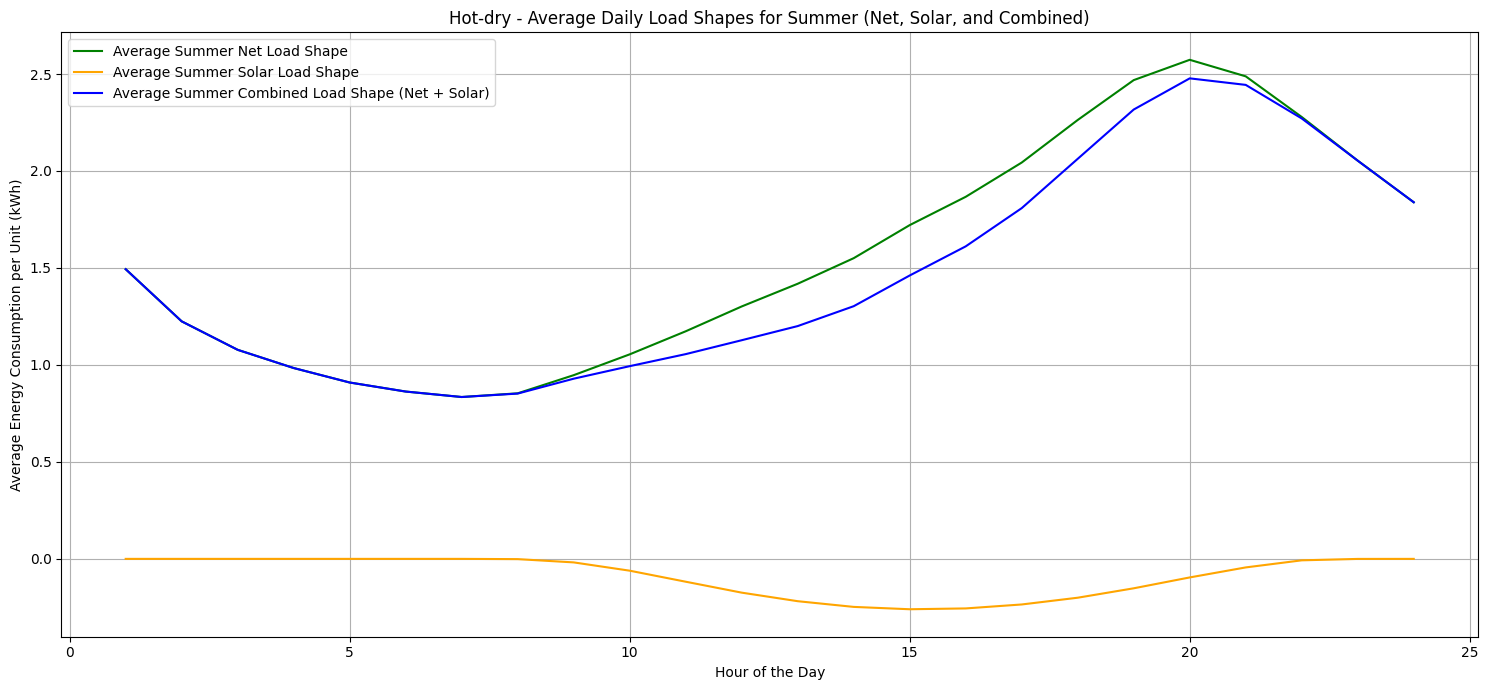

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file for the hot-dry climate zone into a DataFrame
zone = 'hot-dry'
file_path = f'../data/raw/NREL/america-climate-zones/up09-{zone}-single-family_detached.csv'
df = pd.read_csv(file_path)

# Column names for net energy consumption and solar
net_energy_column = 'out.electricity.net.energy_consumption.kwh'
solar_energy_column = 'out.electricity.pv.energy_consumption.kwh'
scale_factor_column = 'units_represented'

# Ensure units_represented is not zero to avoid division by zero
df[scale_factor_column].replace(0, 1, inplace=True)

# Convert columns to numeric to avoid TypeErrors during calculations
df[net_energy_column] = pd.to_numeric(df[net_energy_column], errors='coerce')
df[solar_energy_column] = pd.to_numeric(df[solar_energy_column], errors='coerce')
df[scale_factor_column] = pd.to_numeric(df[scale_factor_column], errors='coerce')

# Scale the data by the number of units represented (divide to get the average per unit)
df[net_energy_column] = df[net_energy_column] / df[scale_factor_column]
df[solar_energy_column] = df[solar_energy_column] / df[scale_factor_column]

# Calculate day of year and filter for summer and winter days
df['day_of_year'] = df.index // 24
summer_days = df[df['day_of_year'].isin(range(152, 245))]  # June 1 to August 31

# Reshape data to get average profiles for summer
summer_reshaped_net = summer_days[net_energy_column].values.reshape(-1, 24)
summer_reshaped_solar = summer_days[solar_energy_column].values.reshape(-1, 24)

avg_summer_profile_net = summer_reshaped_net.mean(axis=0)
avg_summer_profile_solar = summer_reshaped_solar.mean(axis=0)
avg_summer_profile_combined = avg_summer_profile_net + avg_summer_profile_solar

# Plotting
plt.figure(figsize=(15, 7))

# Plot net energy consumption, solar energy consumption, and combined energy consumption for summer
plt.plot(range(1, 25), avg_summer_profile_net, label='Average Summer Net Load Shape', color='green')
plt.plot(range(1, 25), avg_summer_profile_solar, label='Average Summer Solar Load Shape', color='orange')
plt.plot(range(1, 25), avg_summer_profile_combined, label='Average Summer Combined Load Shape (Net + Solar)', color='blue')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption per Unit (kWh)')
plt.title(f'{zone.capitalize()} - Average Daily Load Shapes for Summer (Net, Solar, and Combined)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
